In [27]:
import sys
sys.path.append('..')

from sklearn.datasets import make_regression

import numpy as np
from src import grad_desc_algos as gda



import matplotlib.pyplot as plt
from matplotlib import ticker, cm
%matplotlib inline

In [28]:
features, target, coef = make_regression(n_samples=1000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=10.0,
                                         coef = True,
                                         random_state=1)

array([-1.98367142e+02, -7.18777056e+01, -8.69703239e+01, -6.96492401e+01,
        1.82745760e+01, -3.77114686e+01,  3.92726728e+01, -9.78831863e+01,
       -9.79418533e+01, -1.18326213e+02,  7.37176065e+01,  1.15947984e+01,
       -1.14639116e+02,  1.18554758e+02, -1.09479268e+02,  4.55822523e+01,
        1.22163385e+01, -7.55247901e+01, -1.07584299e+02, -1.52546032e+02,
        6.76376929e+00,  9.63814831e+00, -2.16279129e+01,  7.04567440e+01,
        1.07700199e+02,  1.09477518e+01,  1.17165036e+02,  2.78449353e+01,
        3.24248766e+01, -1.55808165e+01,  9.64321593e+01, -2.68980403e+02,
        3.04398725e+01, -5.03731238e+01,  1.83865434e+01, -4.20020243e+01,
        2.60722898e+01, -4.24419694e+01, -2.84245422e+01,  7.87732991e+01,
        6.38527251e+01,  1.05600811e+02,  2.54784577e+01, -4.37001825e+01,
       -4.56639834e+01,  2.25475298e+01, -2.44159979e+01,  2.14189935e+00,
       -7.55772986e+01,  9.71903066e+01, -1.01696566e+02,  1.10063672e+02,
        3.74493102e+01,  

## Batch Gradient Descent

In [33]:
lr = 0.01
theta = np.array([0,0])
epochs = 1000


def batch_gradient_descent(X, y, theta, lr, epochs):
    thetas = theta
    results = np.array([0,0])
    for i in range(epochs):
        theta, MSE = gda.gd(X, y, theta, lr)
        thetas = np.vstack([thetas, theta])
        results = np.vstack([results, np.array([i+1, MSE])])
        
    return thetas, results

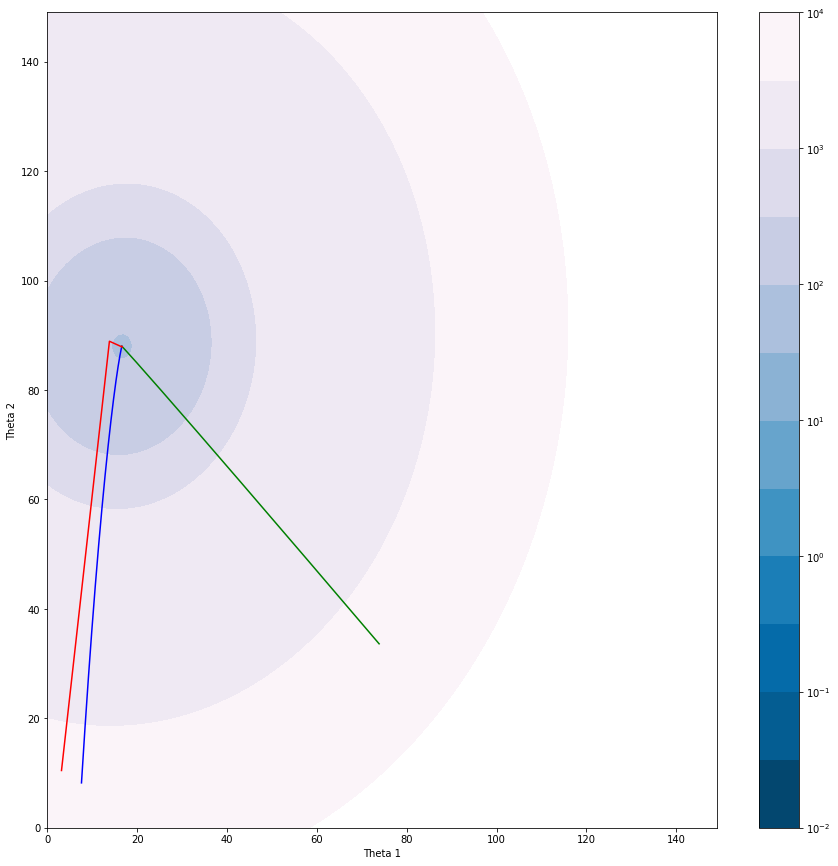

Final thetas: [16.61830202 87.98176447]
Actual Coefficents: [16.88001901 87.91985605]


In [34]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(15, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

epochs = 10000

learing = [0.01, 0.1, 1]
colors = ['b', 'g', 'r']
random_start = [np.random.random(2,)*100 for i in range(3)]

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = batch_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c)
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

## Stochastic Gradient Descent

In [173]:
def stochastic_gradient_descent(X, y, theta, lr, epochs):
    thetas = theta
    results = np.array([0,0])
    for i in range(epochs):
        y = np.reshape(y, (y.shape[0], 1)) ## Currently only works for target provided by sklearn
        Xy = np.concatenate((X,y), axis = 1)
        np.random.shuffle(Xy)
        X = Xy[:,:X.shape[1]]
        y = Xy[:, -1]
        for xi, yi in zip(X,y):
            theta, MSE = gda.gd(xi, yi, theta, lr)
            thetas = np.vstack([thetas, theta])
            results = np.vstack([results, np.array([i+1, MSE])])
        
    return thetas, results

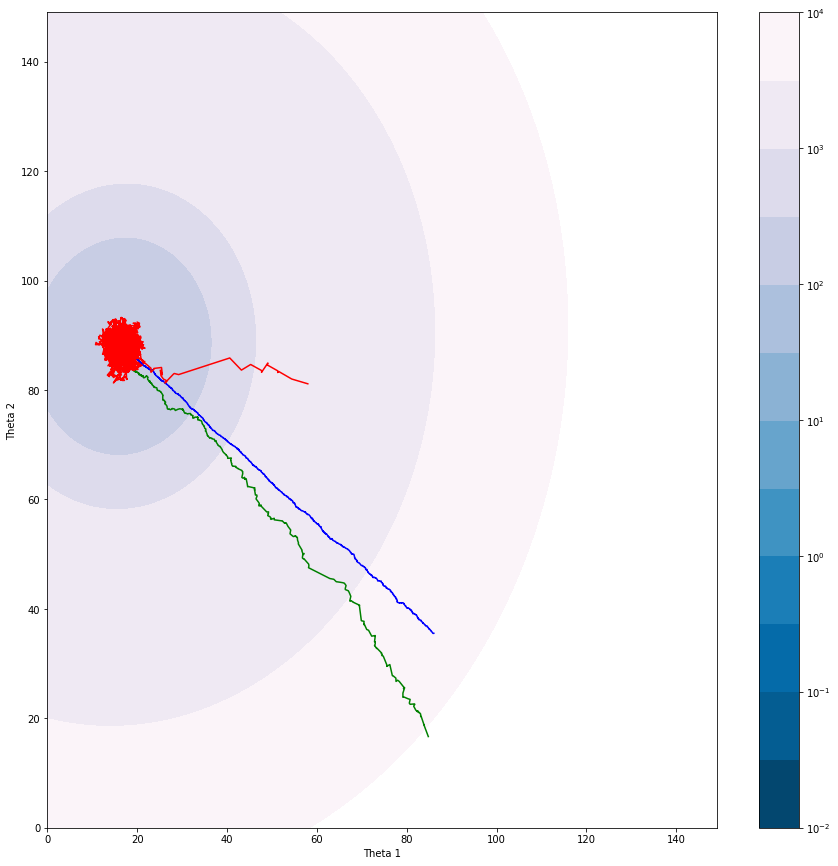

Final thetas: [16.48438632 88.5461813 ]
Actual Coefficents: [16.88001901 87.91985605]


In [191]:
x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.average((np.dot(features, np.array([xx, yy])) - target) ** 2)
levels = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]

fig, ax = plt.subplots(figsize=(15, 15))
cs = ax.contourf(x,y,z, levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)


learing = [0.001, 0.01, 0.1]
colors = ['b', 'g', 'r']
random_start = [np.array([[]])]
epochs = 10

for lr, c, rs in zip(learing, colors,random_start):
    theta = rs
    thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)
    ax.plot(thetas[:,0],thetas[:,1], c)
    
cbar = fig.colorbar(cs)
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()
print("Final thetas: {}".format(thetas[-1]))
print("Actual Coefficents: {}".format(coef))

In [188]:
learing = [0.01, 0.1]
random_start = [np.random.random((2,))*100 for i in range(2)]
epochs = 100

for lr, rs in zip(learing, random_start):
    theta = rs
    thetas, MSE = stochastic_gradient_descent(features, target, theta, lr, epochs)

[[85.47790893 76.47623874]
 [85.46505092 76.51246458]
 [85.42873621 76.47037824]
 ...
 [16.3900688  88.01252075]
 [16.39348026 87.99081028]
 [16.35770441 88.00305213]] [[  0.           0.        ]
 [  1.         123.41342183]
 [  1.         614.7436016 ]
 ...
 [100.          21.99452506]
 [100.           2.02174951]
 [100.          75.02004845]]
[[53.27658848 33.98161388]
 [46.70586418 36.83362252]
 [45.8659451  41.15090871]
 ...
 [16.19566711 85.84498442]
 [15.80882334 85.48250556]
 [14.1008877  86.17415366]] [[0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.32224378e+03]
 [1.00000000e+00 5.61209597e+03]
 ...
 [1.00000000e+02 1.11997933e+01]
 [1.00000000e+02 4.25165357e+01]
 [1.00000000e+02 4.40548685e+02]]


In [156]:
y = np.array([9, 10 , 11])

In [157]:
y

array([ 9, 10, 11])

In [158]:
y = np.reshape(y, (y.shape[0], 1)) 

In [159]:
y

array([[ 9],
       [10],
       [11]])

In [160]:
Xy = np.concatenate((X,y), axis = 1)
Xy

array([[ 6,  7,  8,  9],
       [ 3,  4,  5, 10],
       [ 0,  1,  2, 11]])

In [161]:
np.random.shuffle(Xy)

In [162]:
Xy

array([[ 0,  1,  2, 11],
       [ 6,  7,  8,  9],
       [ 3,  4,  5, 10]])

In [163]:
X = Xy[:,:X.shape[1]]

In [164]:
X

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

In [167]:
y = Xy[:, -1]

In [168]:
y

array([11,  9, 10])

In [172]:
for xi, yi in zip(X,y):
    print(type(xi), type(yi))

<class 'numpy.ndarray'> <class 'numpy.int32'>
<class 'numpy.ndarray'> <class 'numpy.int32'>
<class 'numpy.ndarray'> <class 'numpy.int32'>


In [184]:
[np.random.random((2,))*100 for i in range(3)]

[array([80.90061676, 21.02859327]),
 array([84.10938354, 21.26427015]),
 array([23.41438043, 39.41057858])]